In [39]:
# Import from local package
import sys
sys.path.append('../model')

from tqdm import tqdm_notebook as progress_bar

import torch

In [9]:
from models import SimpleCNN3Layer as Model
from collectdata import DataCollector
from plots import plot_truth_vs_predict
from efficiency import efficiency, ValueSet
from training import select_gpu

In [10]:
# Device configuration
device = select_gpu(0)
#device = torch.device("cpu")

1 available GPUs (initially using device 0):
  0 TITAN V


In [11]:
collector = DataCollector(
    "/data/schreihf/PvFinder/Aug_15_140000.npz",
    120_000, 10_000)

Loaded /data/schreihf/PvFinder/Aug_15_140000.npz in 8.931 s
Samples in Training: 120000 Validation: 10000 Test: 10000


In [12]:
validation = collector.get_validation(1, device=device)

Constructing dataset on cuda:0 took 0.4941 s


In [13]:
model = Model().to(device)

In [44]:
model.load_state_dict(torch.load('../model/output3/20180815_120000_3layer_30.pyt'))
model.eval()

SimpleCNN3Layer(
  (conv1): Conv1d(1, 10, kernel_size=(25,), stride=(1,), padding=(12,))
  (conv2): Conv1d(10, 5, kernel_size=(15,), stride=(1,), padding=(7,))
  (conv3): Conv1d(5, 1, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv3dropout): Dropout(p=0.35)
  (fc1): Linear(in_features=4000, out_features=4000, bias=True)
)

In [45]:
%%time
with torch.no_grad():
    outputs = model(validation.dataset.tensors[0]).cpu().numpy()
    labels = validation.dataset.tensors[1].cpu().numpy()

CPU times: user 178 ms, sys: 89 ms, total: 267 ms
Wall time: 265 ms


In [46]:
%%time
total = ValueSet(0,0,0,0)

for label, output in zip(labels, outputs):
    total += efficiency(label, output, 1e-2, 5.)

CPU times: user 188 ms, sys: 2.53 ms, total: 191 ms
Wall time: 194 ms


In [47]:
print(total.pretty())

Real PVs in validation set: 55,048
Successes: Either 44,070 or 44,292, depending on how you count.
Missed true PVs: 10,978
False positives: 1,924
Efficency of detecting real PVs: 80.06%
False positive rate: 3.50%


# Some examples of the counting algorithm:

In [48]:
for i in range(20):
    result = efficiency(labels[i], outputs[i], 1e-2, 5.)
    print(result)

Total: 4, Successes: 3, MT: 1 (75.00%), FP: 1 (25.00%)
Total: 8, Successes: 7, MT: 1 (87.50%), FP: 0 (0.00%)
Total: 4, Successes: 2, MT: 2 (50.00%), FP: 1 (25.00%)
Total: 6, Successes: 4, MT: 2 (66.67%), FP: 0 (0.00%)
Total: 6, Successes: 5, MT: 1 (83.33%), FP: 0 (0.00%)
Total: 8, Successes: 7, MT: 1 (87.50%), FP: 0 (0.00%)
Total: 6, Successes: 5, MT: 1 (83.33%), FP: 0 (0.00%)
Total: 5, Successes: 3, MT: 2 (60.00%), FP: 0 (0.00%)
Total: 6, Successes: 3, MT: 3 (50.00%), FP: 0 (0.00%)
Total: 4, Successes: 2, MT: 2 (50.00%), FP: 0 (0.00%)
Total: 4, Successes: 3, MT: 1 (75.00%), FP: 0 (0.00%)
Total: 4, Successes: 4, MT: 0 (100.00%), FP: 1 (25.00%) (Sp: 5)
Total: 6, Successes: 6, MT: 0 (100.00%), FP: 0 (0.00%)
Total: 7, Successes: 6, MT: 1 (85.71%), FP: 0 (0.00%)
Total: 1, Successes: 1, MT: 0 (100.00%), FP: 0 (0.00%)
Total: 1, Successes: 1, MT: 0 (100.00%), FP: 0 (0.00%)
Total: 5, Successes: 4, MT: 1 (80.00%), FP: 0 (0.00%)
Total: 2, Successes: 2, MT: 0 (100.00%), FP: 0 (0.00%)
Total: 6, Su

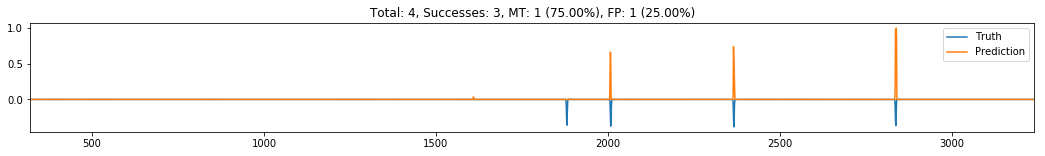

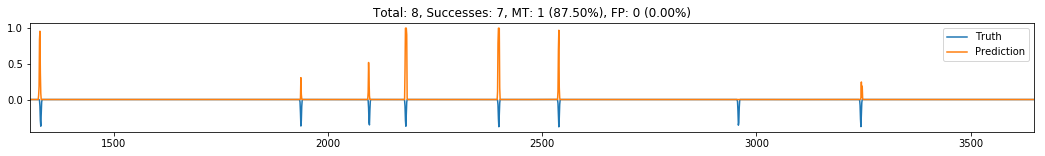

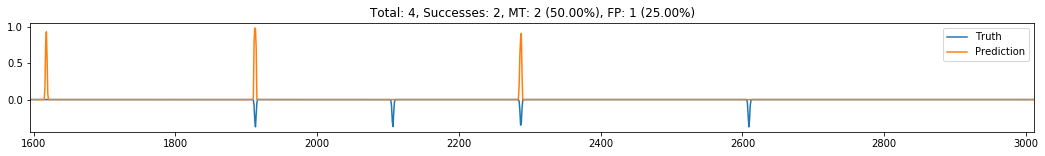

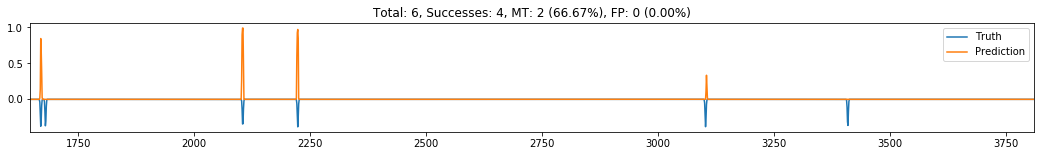

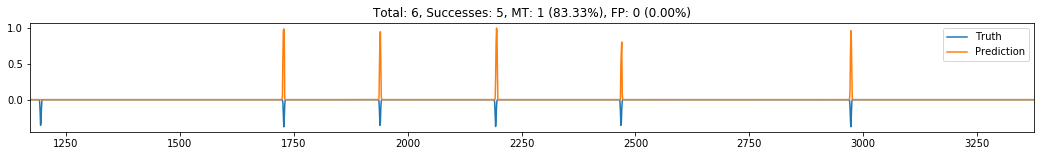

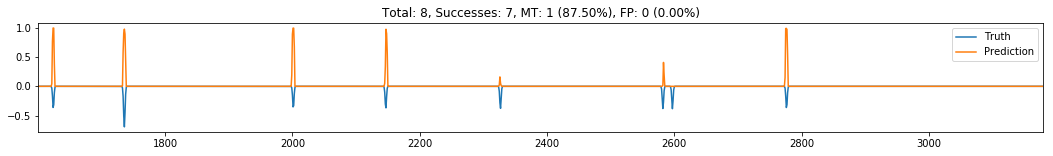

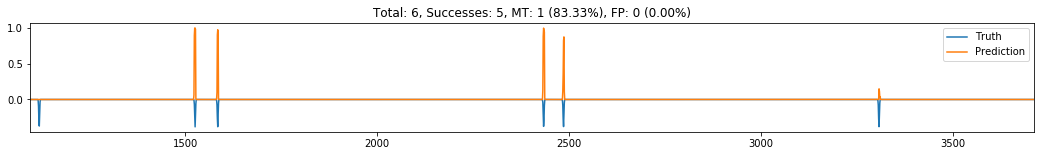

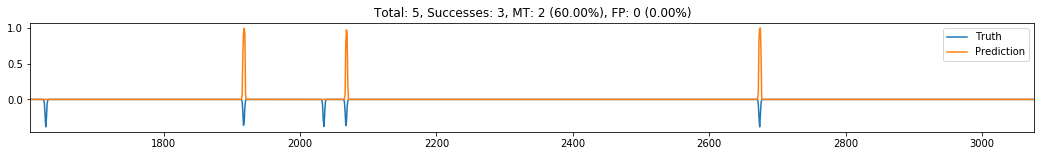

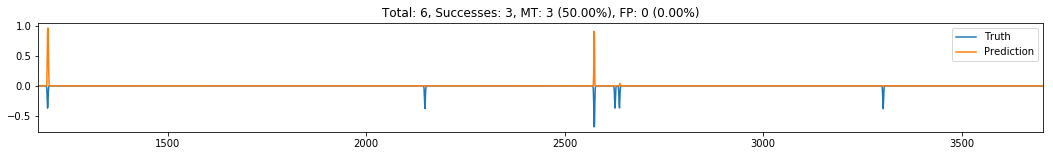

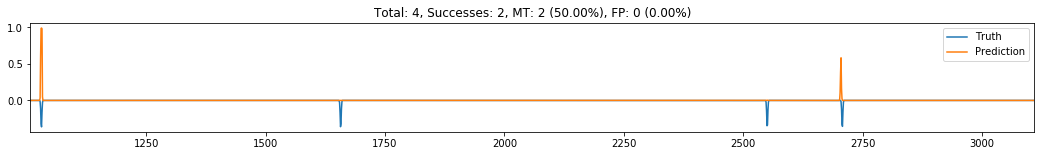

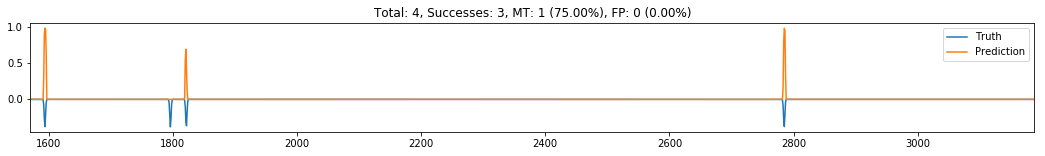

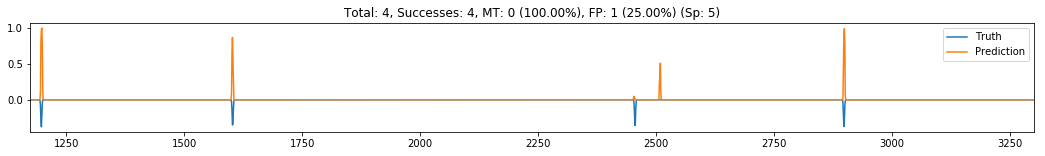

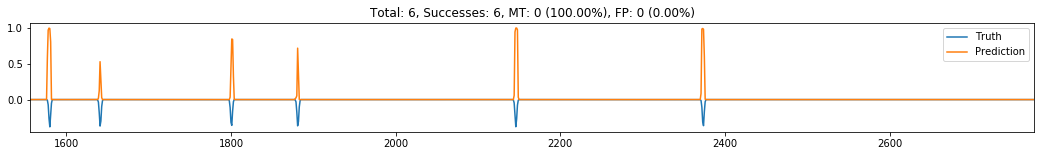

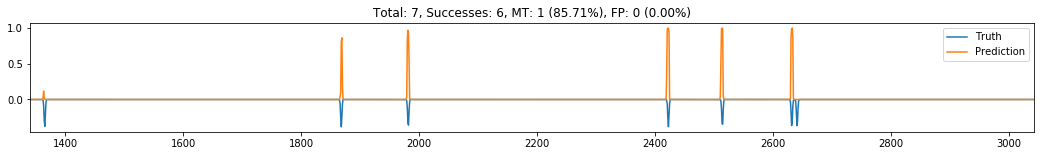

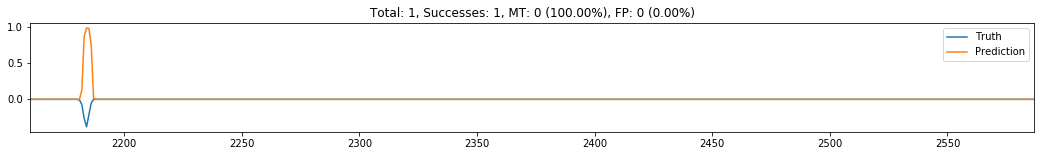

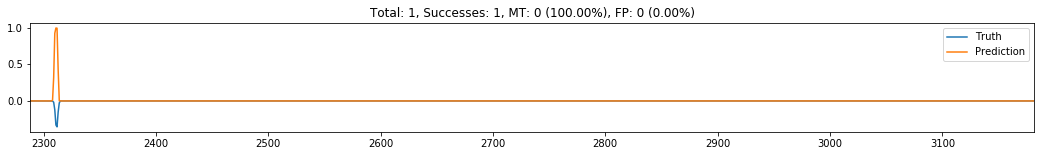

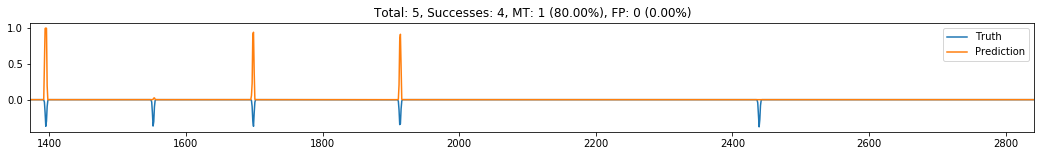

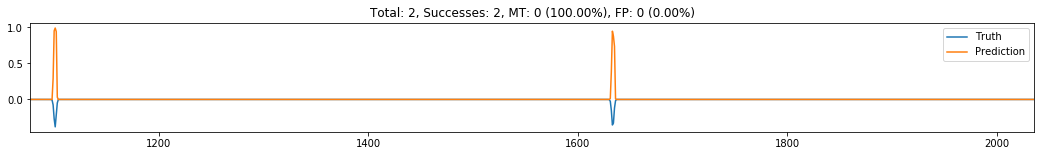

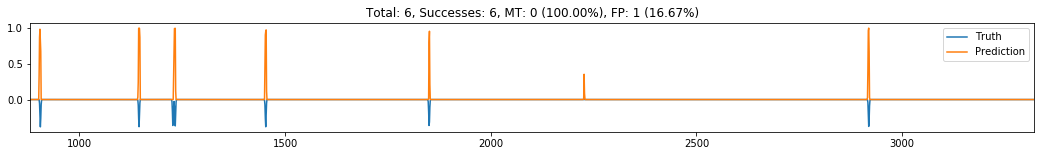

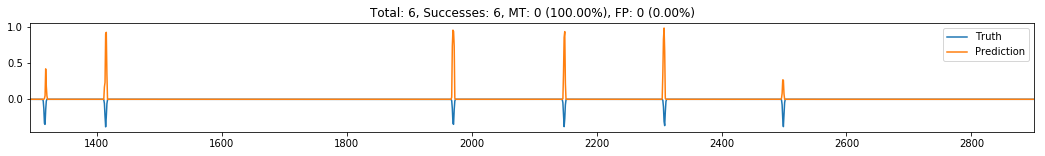

In [49]:
for i in range(20):
    result = efficiency(labels[i], outputs[i], 1e-2, 5.)
    ax = plot_truth_vs_predict(labels[i], outputs[i])
    ax.set_title(str(result))